# Random Forest Model  


In [49]:
import numpy as np
import matplotlib.pyplot as plt # for plotting, for visualizations
import pandas as pd # for data manipulation and analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt

## Import Data

In [50]:
dataset = pd.read_csv('insurance.csv')
print(dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


## Data Cleaning  
Replacing "smoker" and "sex" columns to a boolean & drop Region column

In [51]:
dataset['smoker'] = dataset['smoker'].map({'yes': 1, 'no': 0})
dataset['sex'] = dataset['sex'].map({'male': 1, 'female': 0})

dataset = dataset.drop(columns=['region'])

print(dataset)

      age  sex     bmi  children  smoker      charges
0      19    0  27.900         0       1  16884.92400
1      18    1  33.770         1       0   1725.55230
2      28    1  33.000         3       0   4449.46200
3      33    1  22.705         0       0  21984.47061
4      32    1  28.880         0       0   3866.85520
...   ...  ...     ...       ...     ...          ...
1333   50    1  30.970         3       0  10600.54830
1334   18    0  31.920         0       0   2205.98080
1335   18    0  36.850         0       0   1629.83350
1336   21    0  25.800         0       0   2007.94500
1337   61    0  29.070         0       1  29141.36030

[1338 rows x 6 columns]


## Assignning Independent and dependent in a random forest model

In [52]:
X = dataset[['bmi', 'smoker', 'age', 'sex', 'children']]  # Independent variables
y = dataset['charges']  # Dependent variable

## Split data into training and testing

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

* Random forest doesnt need to standardize variables, since the tree-based models doesnt rely on distance calculations

## Initialize & train the Model

In [54]:
model = RandomForestRegressor(n_estimators=100, random_state=0) #random state means the same random values will be generated every time
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

## Make predicitons

In [55]:
y_pred = model.predict(X_test)

## Visualizing Test data

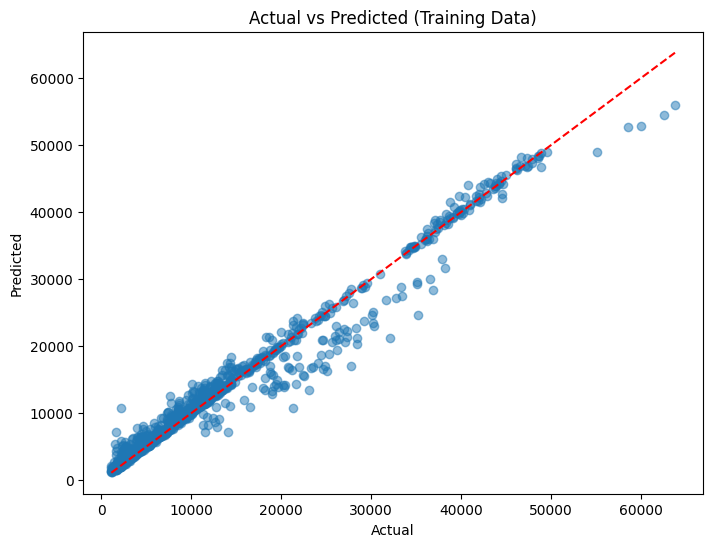

In [56]:
# Predict the target on the training data
y_train_pred = model.predict(X_train)

# Plot actual vs predicted for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.title("Actual vs Predicted (Training Data)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
plt.show()


## Evaluate the Model

In [57]:
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

R-squared: 0.8733524400324877
Mean Squared Error: 20153421.445819378
Root Mean Squared Error: 4489.25622412214
Mean Absolute Error: 2580.3803779030786


### NOTE  
* We can see that with Random Forest model, the % of performance where we can see that it quite high since its close to 1 (meaning 1 is the perfect score)
* Of course there is still room for improvement with 13% more unexplained factor.  
* RMSE and MAE are considered low in this case since we are working with high amount of dependent variable (charges up to 10000 dollar). Which indicates that the model is performing well. 

## Which variables have the most impact  
* By far Smoker have the most impact on this model

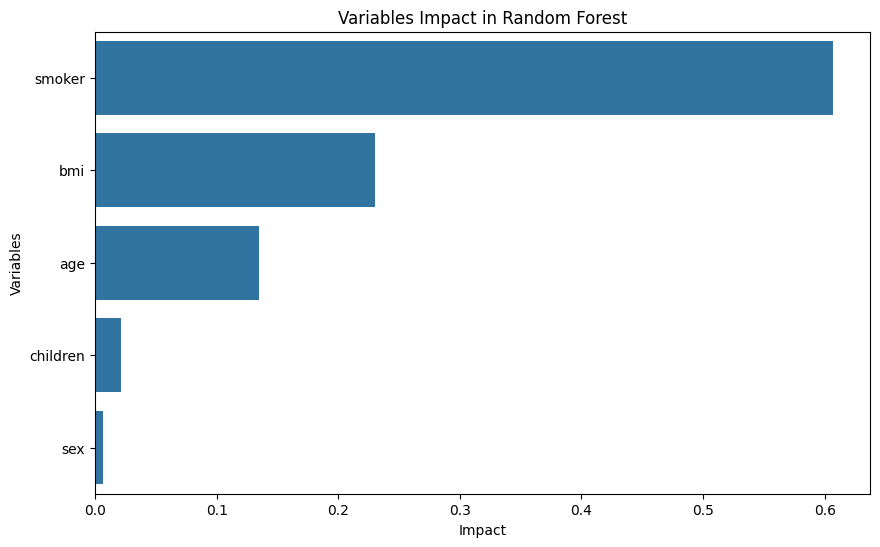

In [58]:
# Feature importances shows which variables have the most significant impact on the model
feature_importances = model.feature_importances_

# Assigning variables and their impact to a dataframe
importance_df = pd.DataFrame({
    'Variables': X.columns,
    'Impact': feature_importances
})

# Sort by the most impacted variables
importance_df = importance_df.sort_values(by='Impact', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Impact', y='Variables', data=importance_df)
plt.title("Variables Impact in Random Forest")
plt.show()


## Plot actual vs predicted charges  

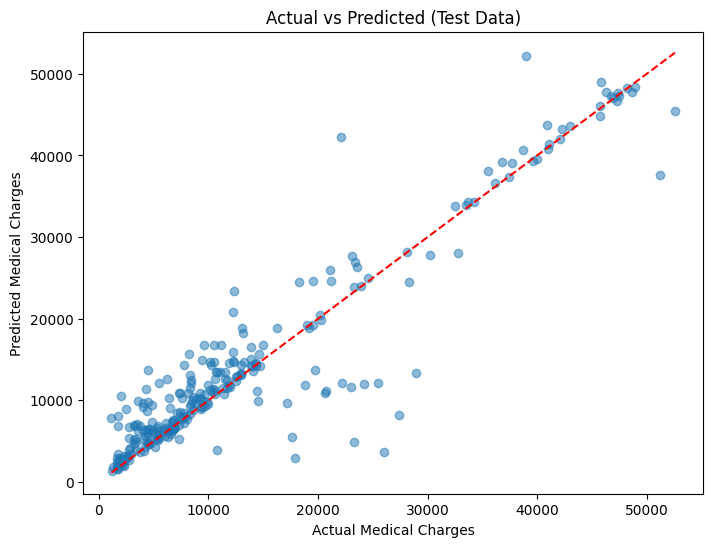

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a line for predictions
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], '--', color='red')

plt.xlabel("Actual Medical Charges")
plt.ylabel("Predicted Medical Charges")
plt.title("Actual vs Predicted (Test Data)")

plt.show()

### NOTE  
* We can see that the data are aligned with the 45 degree in general, which mean that random forest model generally predicts medical charges accurately for a wide range of data, especially for lower and middle charges.  
* Although, even this model perform better than Multiple linear regression, Random Forest also perform better when it comes to lower charges (which shows that most of the data clustered around the lower charges area)

### Residual Plot  
shows an error for each prediction, where if data is at 0 indicating close to the actual value. And if far from 0, menaing model's prediction are off

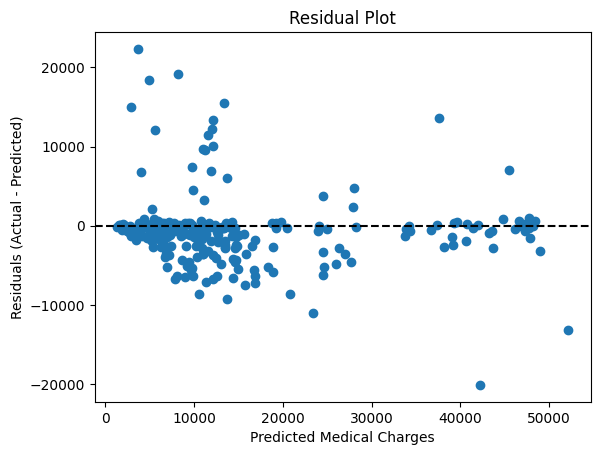

In [60]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Medical Charges")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


### NOTE  
* We can see here that most of the data are clusterd around the straight line mostly at 0.  
* This indicates that the more data that are align with the straight line shows the better the prediction.  
* From 0 to 20000 shows that the prediction are able to predicted when the charges are low, but when the charges is getting higher (after 20000) its getting more unreliable for the model to predict.